In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv('train.csv')

In [3]:
train['BathPerRoom'] = (train['FullBath'] + 0.5 * train['HalfBath']) / train['BedroomAbvGr']
train['IsMultiFamily'] = train['KitchenAbvGr'] > 1

In [4]:
from sklearn.cluster import KMeans
features = train[['BedroomAbvGr', 'FullBath', 'KitchenAbvGr', 'GrLivArea']]
kmeans = KMeans(n_clusters=3, random_state=42)
train['HouseType'] = kmeans.fit_predict(features)

In [6]:
train['BathRatio'] = (train['FullBath'] + 0.5 * train['HalfBath'])
train['LivingPerRoom'] = train['GrLivArea'] / train['TotRmsAbvGrd']
train['ShareabilityScore'] = (train['BathRatio'] * 0.7) + (train['LivingPerRoom'] * 0.3)

In [8]:
threshold = train['ShareabilityScore'].quantile(0.7)
train['HouseCategory'] = 'Traditional/Solo'
train.loc[train['ShareabilityScore'] >= threshold, 'HouseCategory'] = 'Beyond Families'

In [9]:
%matplotlib inline

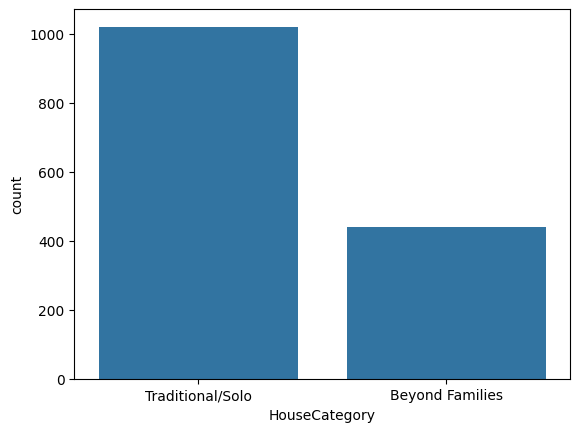

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='HouseCategory', data=train)

plt.show()

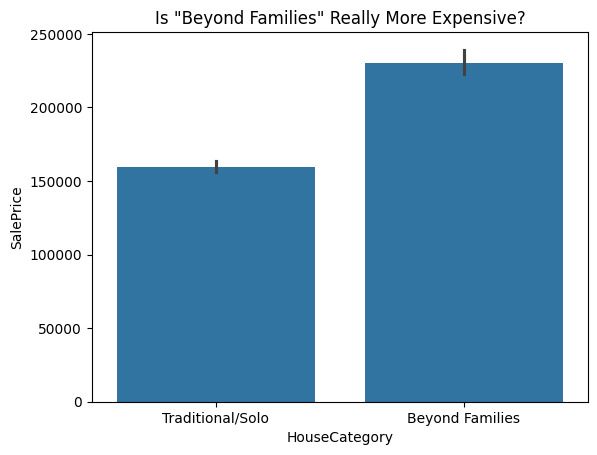

In [11]:
sns.barplot(x='HouseCategory', y='SalePrice', data=train)
plt.title('Is "Beyond Families" Really More Expensive?')
plt.show()

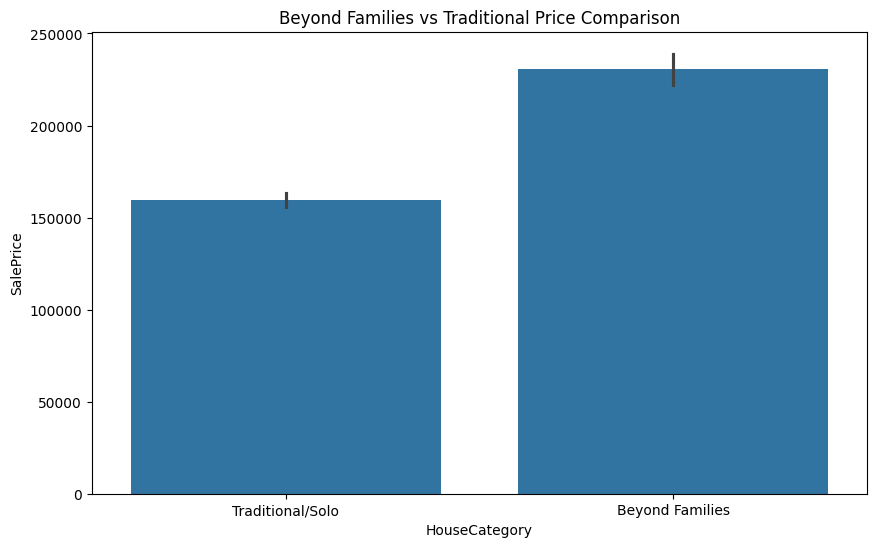

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x='HouseCategory', y='SalePrice', data=train)
plt.title('Beyond Families vs Traditional Price Comparison')
plt.savefig('sharehouse_price_diff.png')